#  DATA PREPARATION & ANALYSIS 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

## Dataset Preview

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**No nan in dataset, few columns still in object**

In [5]:
for col in df:
    print(col, df[col].nunique())

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
y 2


In [6]:
for col in df:
    print(col, df[col].unique())

age [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
duration [ 261  149  226 ... 1246 1556 1868]
campaign [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
pdays [999

## Categorical Features Analysis

In [7]:
def stack2dim(raw, i, j, rotation = 0, location = 'upper left'):

#    plt.figure(figsize = (15, 10))
    import math
    data_raw = pd.crosstab(raw[i], raw[j])
    data = data_raw.div(data_raw.sum(1), axis=0)  
    
    createVar = locals()
    x = [0] 
    width = [] 
    k = 0
    for n in range(len(data)):
        
        createVar['width' + str(n)] = data_raw.sum(axis=1)[n] / sum(data_raw.sum(axis=1))
        width.append(createVar['width' + str(n)])  
        if n == 0:
            continue
        else:
            k += createVar['width' + str(n - 1)] / 2 + createVar['width' + str(n)] / 2 + 0.05
            x.append(k)  
    
    y_mat = []
    n = 0
    for p in range(data.shape[0]):
        for q in range(data.shape[1]):
            n += 1
            y_mat.append(data.iloc[p, q])
            if n == data.shape[0] * 2:
                break
            elif n % 2 == 1:
                y_mat.extend([0] * (len(data) - 1))
            elif n % 2 == 0:
                y_mat.extend([0] * len(data))

    y_mat = np.array(y_mat).reshape(len(data) * 2, len(data))
    y_mat = pd.DataFrame(y_mat) 
    
    createVar = locals()
    for row in range(len(y_mat)):
        createVar['a' + str(row)] = y_mat.iloc[row, :]
        if row % 2 == 0:
            if math.floor(row / 2) == 0:
                label = data.columns.name + ': ' + str(data.columns[row])
                plt.bar(x, createVar['a' + str(row)],
                        width=width[math.floor(row / 2)], label='0', color='#5F9EA0')
            else:
                plt.bar(x, createVar['a' + str(row)],
                        width=width[math.floor(row / 2)], color='#5F9EA0')
        elif row % 2 == 1:
            if math.floor(row / 2) == 0:
                label = data.columns.name + ': ' + str(data.columns[row])
                plt.bar(x, createVar['a' + str(row)], bottom=createVar['a' + str(row - 1)],
                        width=width[math.floor(row / 2)], label='1', color='#8FBC8F')
            else:
                plt.bar(x, createVar['a' + str(row)], bottom=createVar['a' + str(row - 1)],
                        width=width[math.floor(row / 2)], color='#8FBC8F')

    plt.title(j + ' vs ' + i)
#    group_labels = [data.index.name + ': ' + str(name) for name in data.index]
    group_labels = [str(name) for name in data.index]
    plt.xticks(x, group_labels, rotation = rotation)
    plt.ylabel(j)
    plt.legend(shadow=True, loc=location)
    plt.show()

**Plotting all categorical variables to label**

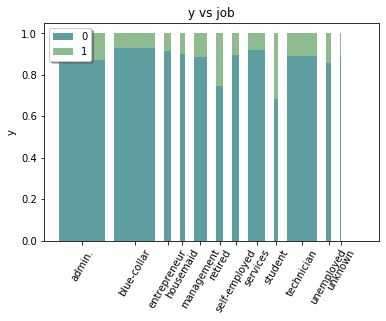

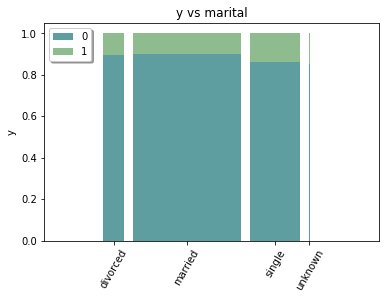

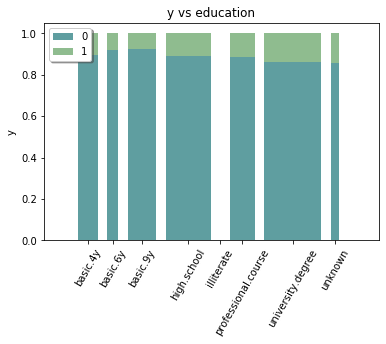

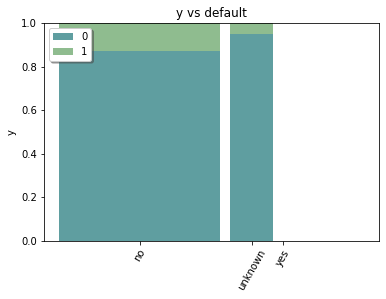

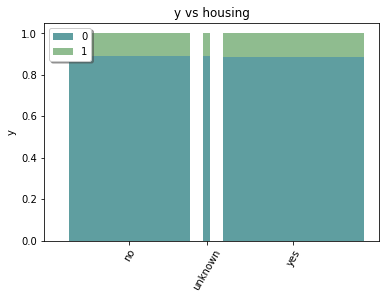

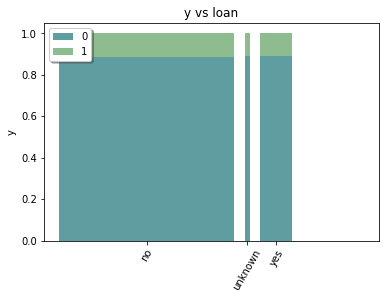

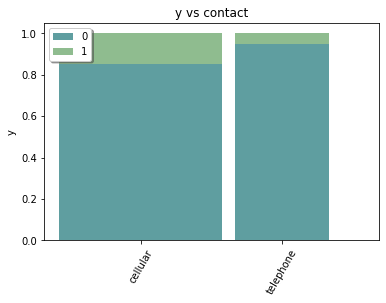

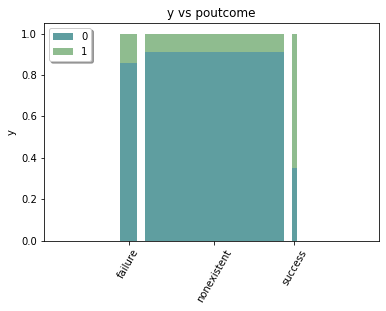

In [8]:
categorical_columns=['job','marital','education','default','housing','loan','contact','poutcome']

fig = plt.figure()
for col in categorical_columns:
    stack2dim(df, i=col, j='y', rotation = 60)
fig.set_size_inches(30, 30)



**The graphs above illustrate the percentage of clients who subscribed a term deposit or not (0 or 1) in each categorical feature. Each graph will consist of several categories to describe the percentage of each label.The values have been normalized against each category. The width of the graph in each category represents the domination of categories in the variable.**

**y vs job**

From this graph it is known that the percentage of clients with the largest number of labels 1 is owned by clients who work as students (around 35%), followed by retirees (about 25%) and administrators and who do not have jobs (around 15%). The thing to note is that categories with a large percentage of label 1 do not dominate in this variable. The marketing team should offer more to students, retirees and unemployed. And calls for blue-collar workers can be reduced because they provide the lowest percentage but the number of targets is the most dominating.


**y vs marital**

marital status which has the largest label 1 percentage is a single status. But known from the data if offers for clients who are single are far less than those who are married. This correlates with work groups where students have the highest percentage. Then the marketing team should be able to pay more attention to the segmentation of young people.


**y vs education**

Awareness of saving correlates with client's level of education, it is known that the segmentation that has a university degree has the largest percentage to join a term deposit.


**y vs default**

This graph illustrates the percentage of credit ownership status against the possibility of joining a term saving. It is known that only 3 people have credit so that they do not appear on the chart. Whereas segmentation that does not have credit has a percentage labeled 1 of 15%.


**y vs housing**

Based on this graph, it is known that there is no correlation between ownership of housing loan and the percentage to join a term saving because there is no significant percentage difference between the three groups.


**y vs loan**

Based on this graph it is also known that there is no correlation between personal loan ownership status with the percentage to join term savings because there is no significant percentage difference between the three groups.


**y vs contact**

This graph is quite interesting because it illustrates the differences betwwen two groups that are quite significant. Based on the data it is known that the percentage of someone to join a term deposit if contacted by cellular phone is around 15% and the percentage of those contacted by telephone is only about 5%. So that by contacting the client via cellular will have a 3 times bigger chance.


**y vs poutcame**

Based on the data it's known that if someone who has previously joined a term deposit then the next opportunity (campaign) will have a great opportunity to re-join that is equal to 65%. Whereas for those who previously refused (failure), they have a higher chance to join compared to those who have never been contacted. This data is very interesting because it can be evidence for the marketing department that customers who have joined have no regrets (sastified) and tend to want to join again. For clients who in the previous campaign refused it, they can change their decision in the current campaign that means their decision can change.


## Data Cleaning

**Numbering non-categorical data**

In [10]:
df['month']=df['month'].map({'mar':1,'apr':2,'may':3,'jun':4,'jul':5,'aug':6,'sep':7,'oct':8,'nov':9,'dec':10})

df['day_of_week']=df['day_of_week'].map({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5})

df['y']=df['y'].map({'no':0, 'yes':1})

**Numbering categorical columns**

In [12]:
dummies= pd.get_dummies(df[['job','marital','education','default','housing','loan','contact','poutcome']],drop_first=True)  

In [13]:
df=df.drop(['job','marital','education','default','housing','loan','contact','poutcome'],axis=1)

In [14]:
df=pd.concat([df,dummies],axis=1)

In [15]:
df=df.drop('duration',axis=1)

**This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.**

In [16]:
#df.to_csv('clean_df.csv', index = False)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   month                          41188 non-null  int64  
 2   day_of_week                    41188 non-null  int64  
 3   campaign                       41188 non-null  int64  
 4   pdays                          41188 non-null  int64  
 5   previous                       41188 non-null  int64  
 6   emp.var.rate                   41188 non-null  float64
 7   cons.price.idx                 41188 non-null  float64
 8   cons.conf.idx                  41188 non-null  float64
 9   euribor3m                      41188 non-null  float64
 10  nr.employed                    41188 non-null  float64
 11  y                              41188 non-null  int64  
 12  job_blue-collar                41188 non-null 

In [18]:
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
month,41188.0,4.607896,2.040998,1.000,3.000,4.000,6.000,10.000
day_of_week,41188.0,2.979581,1.411514,1.000,2.000,3.000,4.000,5.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045


## Continous Features Analysis

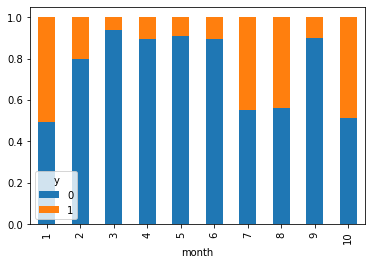

In [19]:
cross_table_month = pd.crosstab(df['month'],df['y'])
cross_table_month.div(cross_table_month.sum(1), axis = 0).plot(kind = 'bar', stacked = True)


**High subscription probability occurs in march, September, October, and December** 

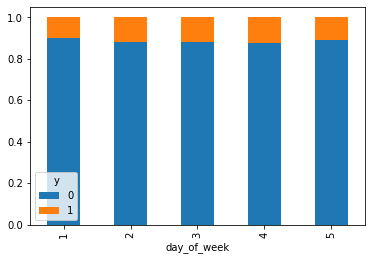

In [20]:
cross_table_day_of_week  = pd.crosstab(df['day_of_week'],df['y'])
cross_table_day_of_week.div(cross_table_day_of_week .sum(1), axis = 0).plot(kind = 'bar', stacked = True)

**There's no significant difference of subscription probability for each day**

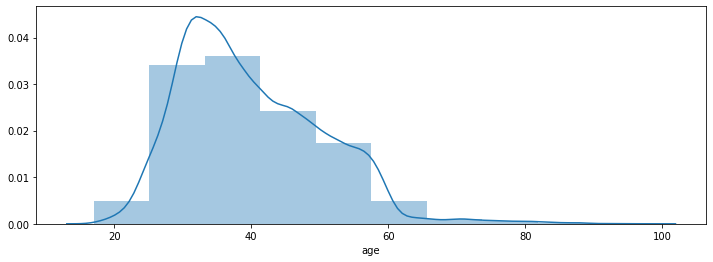

In [21]:
plt.figure(figsize=(12,4))
sns.distplot(df['age'],bins=10) 

**Customer's ages distribution**

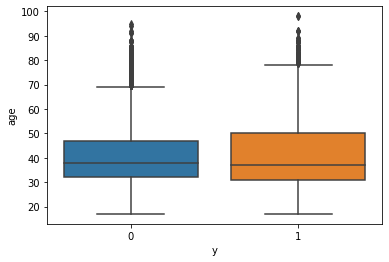

In [22]:
sns.boxplot(x='y',y='age',data=df)

**It's worth to try to all customers (based on customer's age)**

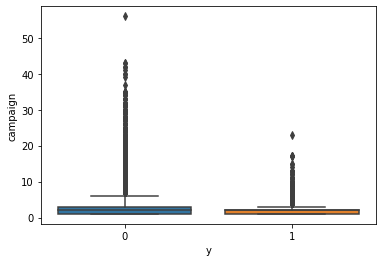

In [23]:
sns.boxplot(x='y',y='campaign',data=df)

**The number of contacts doens't correlatated much to success rate of the marketing
label 1 has smaller interquartile range than label 0. less than 5 calls are still reasonable, more than 5 it's outlier, more than 25 calls it will be doesn't work**

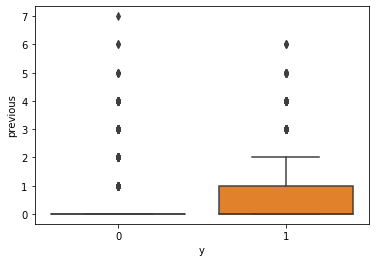

In [24]:
sns.boxplot(x='y',y='previous',data=df)

**The customers have larger probability to subcribe if they have been called once or twice before this campaign.**

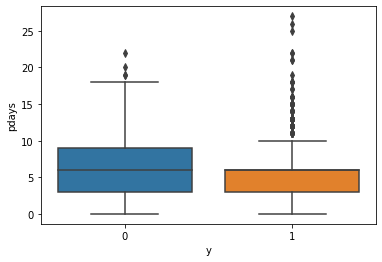

In [25]:
pdays=df[['pdays','y']]
pdays= pdays[pdays['pdays'] != 999]

sns.boxplot(x='y',y='pdays',data=pdays)

**The 'golden moment' is about 3 to 6 days, but it worths to wait until 10 days, more than 10 days it's outlier**

## Dataset Analysis

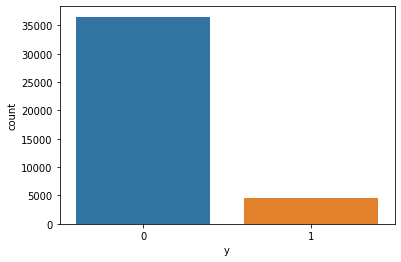

In [26]:
sns.countplot(x='y',data=df)

**Dataset is skew (imbalance dataset). label 1 is only 11.26% of total data.
Due to very unbalance dataset, modeling procedure will only take 2 steps (train and test) without validation step.**

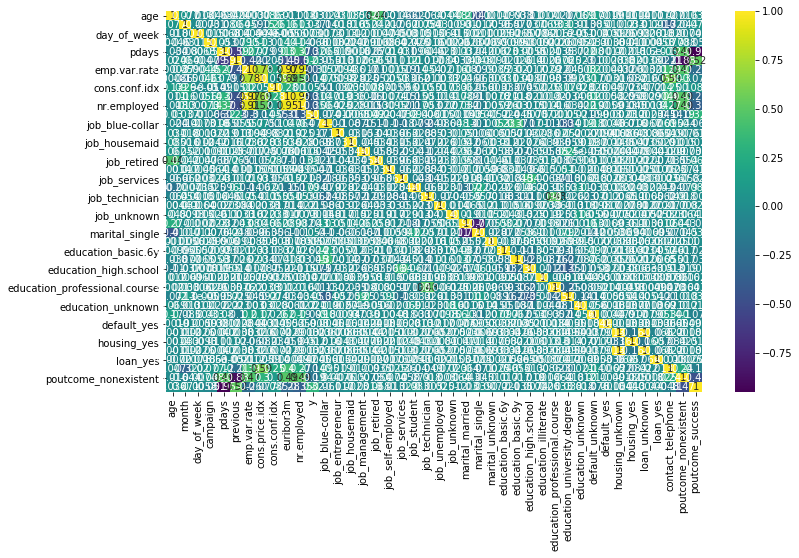

In [27]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

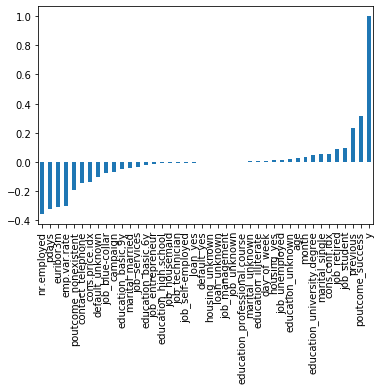

In [28]:
df.corr()['y'].sort_values().plot(kind='bar')

## Formatting Input Data

In [29]:
x = df.drop('y',axis=1).values 
y = df['y'].values

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [31]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Since the dataset is skew, the model's performance measurement will be focussed on f1 score especially for the label 1.** 

# MODELING

## Decision Tree

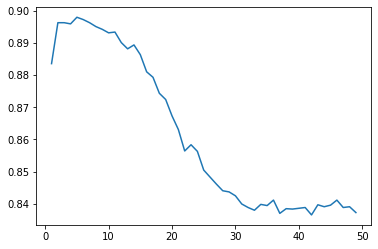

In [33]:
from sklearn.tree import DecisionTreeClassifier
scores=[]
for i in range(1,50):
  tree=DecisionTreeClassifier(max_depth = i) 
  tree.fit(x_train, y_train) 
  scores.append(tree.score(x_test,y_test)) 
plt.plot(range(1,50),scores) 
plt.show()


In [61]:
tree=DecisionTreeClassifier(max_depth = 5) 
tree.fit(x_train, y_train) 
tree.score(x_test,y_test)


0.8980335032774945

In [62]:
predictions = tree.predict(x_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,predictions)) 
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7279
           1       0.68      0.23      0.35       959

    accuracy                           0.90      8238
   macro avg       0.79      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238

[[7173  106]
 [ 734  225]]


## Random Forest

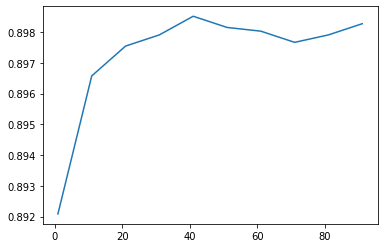

In [37]:
from sklearn.ensemble import RandomForestClassifier
scores=[]
for i in (np.arange(1,100,10)):
  forest = RandomForestClassifier(n_estimators =i, max_depth=8, random_state =101) 
  forest.fit(x_train, y_train) 
  scores.append(forest.score(x_test,y_test)) 
plt.plot(np.arange(1,100,10),scores) 
plt.show()

In [38]:
forest = RandomForestClassifier(n_estimators =41,max_depth=8, random_state =101)
forest.fit(x_train, y_train)
print(forest.score(x_test,y_test))

0.8985190580237922


In [39]:
predictions = forest.predict(x_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,predictions)) 
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      7279
           1       0.73      0.20      0.32       959

    accuracy                           0.90      8238
   macro avg       0.82      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238

[[7206   73]
 [ 763  196]]


## SVM

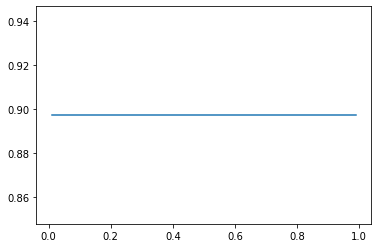

In [41]:
from sklearn.svm import SVC

scores=[]
for i in (np.arange(0.01,1,0.02)):
  svm_lin = SVC(kernel = 'linear', C = i)
  svm_lin.fit(x_train,y_train) 
  scores.append(svm_lin.score(x_test,y_test)) 
plt.plot(np.arange(0.01,1,0.02),scores) 
plt.show()

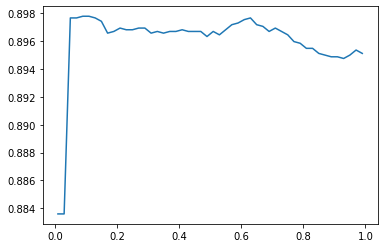

In [42]:
scores=[]
for i in (np.arange(0.01,1,0.02)):
  svm_rbf = SVC(kernel = 'rbf', gamma=i, C = i)
  svm_rbf.fit(x_train,y_train) 
  scores.append(svm_rbf.score(x_test,y_test)) 
plt.plot(np.arange(0.01,1,0.02),scores) 
plt.show()

In [63]:
svm_rbf = SVC(kernel = 'rbf', gamma=0.1, C = 0.1)
svm_rbf.fit(x_train,y_train) 
svm_rbf.score(x_test,y_test) 

0.8977907259043457

In [64]:
predictions = svm_rbf.predict(x_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,predictions)) 
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7279
           1       0.72      0.20      0.31       959

    accuracy                           0.90      8238
   macro avg       0.81      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238

[[7207   72]
 [ 770  189]]


## KNN

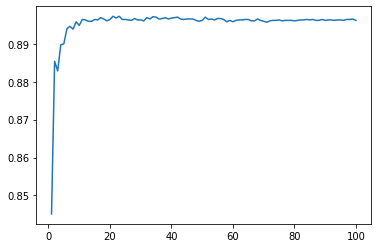

In [46]:
from sklearn.neighbors import KNeighborsClassifier

accuracies=[]
for k in range(1,101):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)
  accuracies.append(knn.score(x_test, y_test)) 
  
k_list=list(range(1,101)) 
plt.plot(k_list,accuracies)
plt.show() 

In [47]:
knn = KNeighborsClassifier(n_neighbors =20)
knn.fit(x_train, y_train)
knn.score(x_test, y_test) 

0.8964554503520272

In [48]:
predictions = knn.predict(x_test) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_test,predictions)) 
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7279
           1       0.71      0.19      0.30       959

    accuracy                           0.90      8238
   macro avg       0.80      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238

[[7203   76]
 [ 777  182]]


## Neural Networks

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

**I have tried many combination for this model with variances number of neurons and layers; dropout values; optimizer=adam, rmsprop,SGD; regularizer= l1,l2, l1_l2 and so far this is the best combination yet**

In [83]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(units=45,activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.fit(x_train,y_train,epochs=100,validation_data=(x_test, y_test), verbose=1,callbacks=[early_stop])

Train on 32950 samples, validate on 8238 samples
Epoch 1/100
32950/32950 [==============================] - 3s 88us/sample - loss: 0.3186 - accuracy: 0.8900 - val_loss: 0.2948 - val_accuracy: 0.8969
Epoch 2/100
32950/32950 [==============================] - 2s 69us/sample - loss: 0.2951 - accuracy: 0.8981 - val_loss: 0.2915 - val_accuracy: 0.8972
Epoch 3/100
32950/32950 [==============================] - 2s 68us/sample - loss: 0.2916 - accuracy: 0.8973 - val_loss: 0.2900 - val_accuracy: 0.8974
Epoch 4/100
32950/32950 [==============================] - 2s 69us/sample - loss: 0.2902 - accuracy: 0.8980 - val_loss: 0.2901 - val_accuracy: 0.8967
Epoch 5/100
32950/32950 [==============================] - 2s 67us/sample - loss: 0.2885 - accuracy: 0.8992 - val_loss: 0.2900 - val_accuracy: 0.8971
Epoch 6/100
32950/32950 [==============================] - 2s 68us/sample - loss: 0.2865 - accuracy: 0.8986 - val_loss: 0.2902 - val_accuracy: 0.8966
Epoch 7/100
32950/32950 [==========================

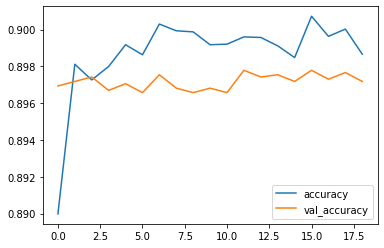

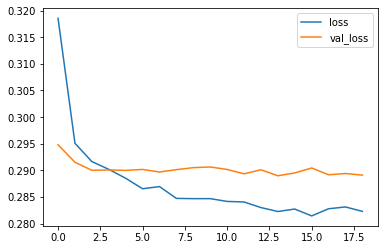

In [85]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()


In [86]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7279
           1       0.72      0.19      0.30       959

    accuracy                           0.90      8238
   macro avg       0.81      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



### **Based on all model's performances (f1 score), I decide to use decision tree to be my model.**

**From modeling with different algorithms gives performance results that are not much different in accuracy values,ranging about 89%. With unbalanced dataset, the f1 score becomes an important measure value to represent the model's performance. The best f1 score for label one (minority) is 35%, which is obtained from random forest model.**

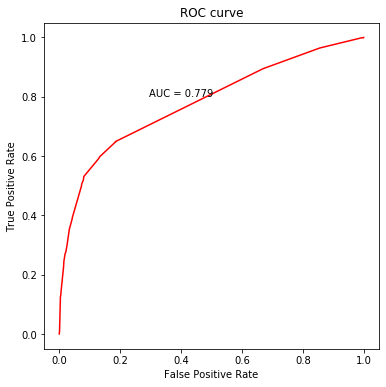

AUC = 0.779


In [87]:
import sklearn.metrics as metrics


predict_probs=tree.predict_proba(x_test)[:,1]


fpr_test, tpr_test, th_test = metrics.roc_curve(y_test, predict_probs)


plt.figure(figsize=[6,6])
plt.plot(fpr_test, tpr_test, 'r-')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.4, 0.8, 'AUC = %.3f' %metrics.auc(fpr_test, tpr_test), ha='center')
plt.show()

print('AUC = %.3f' %metrics.auc(fpr_test, tpr_test))


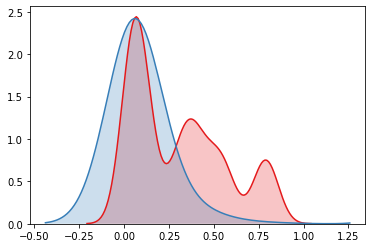

In [91]:
red, blue = sns.color_palette("Set1",2)

sns.kdeplot(predict_probs[y_test==1], shade=True, color=red)
sns.kdeplot(predict_probs[y_test==0], shade=True, color=blue,bw=0.15)

**Since our data is skew, ROC curves can present overly optimistic view of an model's performance. I will consider Precision-Recall Curve instead ROC curve.
With skew dataset, our model will dominated by true negatives and because Precision-Recall Curve using calculation without true negatives factor, it is only concerned with the true positives (minority class)**

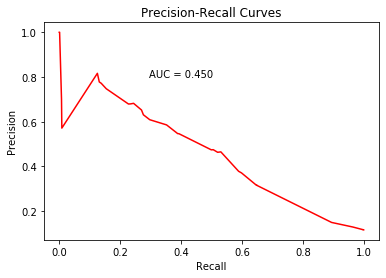

Logistic: f1=0.349 auc=0.450


In [56]:
predict = tree.predict(x_test)
precision, recall, _ = metrics.precision_recall_curve(y_test, predict_probs)
f1, auc = metrics.f1_score(y_test, predict), metrics.auc(recall, precision)
plt.plot(recall, precision, 'r-')
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.text(0.4, 0.8, 'AUC = %.3f' %metrics.auc(recall, precision), ha='center')
plt.show()
print('Logistic: f1=%.3f auc=%.3f' % (f1, auc))